In [64]:
import sqlite3
import csv
import pandas as pd

In [65]:
db=sqlite3.connect("crime_database")

In [66]:
cursor=db.cursor()

In [ ]:
cursor.execute("CREATE TABLE crimes_against_women (state UT TEXT,DISTRICT TEXT,Year INT,Rape INT,Kindanpping INT,Dowry Deaths INT,Assault INT,Insult  INT,Cruelty by Husband  INT,Importation of Girls INT) ")
db.commit()

In [71]:
with open('C:/Users/armaa/OneDrive/Documents/GitHub/Capstone_Project-Crime-in-india/Capstone-Project/Datasets/42_District_wise_crimes_committed_against_women_2001_2012.csv','r') as file :
    #here r is read as
    no_records=0
    for row in file:
        cursor.execute("INSERT INTO crimes_against_women VALUES(?,?,?,?,?,?,?,?,?,?)",row.split(","))#it will split the data row.split
        db.commit()
        no_records += 1
    

In [72]:
print(no_records,'Records Inserted')

9018 Records Inserted


In [73]:
result=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MAX(Rape), MAX(Kindanpping) FROM crimes_against_women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Kindanpping DESC")
for row in result:
    print(row)

('"STATE/UT"', '"DISTRICT"', '"Year"', '"Rape"', '"Kidnapping and Abduction"')
('"UTTAR PRADESH"', '"TOTAL"', 2012, 3425, 7910)
('"UTTAR PRADESH"', '"TOTAL"', 2011, 3406, 7525)
('"UTTAR PRADESH"', '"TOTAL"', 2010, 3135, 5468)
('"UTTAR PRADESH"', '"TOTAL"', 2009, 2998, 5078)
('"UTTAR PRADESH"', '"TOTAL"', 2008, 2937, 4439)
('"UTTAR PRADESH"', '"TOTAL"', 2007, 3010, 3363)
('"UTTAR PRADESH"', '"TOTAL"', 2001, 2851, 2879)
('"UTTAR PRADESH"', '"TOTAL"', 2006, 2900, 2551)
('"UTTAR PRADESH"', '"TOTAL"', 2004, 2875, 2324)
('"UTTAR PRADESH"', '"TOTAL"', 2002, 2891, 2298)
('"UTTAR PRADESH"', '"TOTAL"', 2005, 2921, 2256)
('"RAJASTHAN"', '"TOTAL"', 2003, 2738, 1750)


In [74]:
#3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

In [75]:
result=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MIN(Rape), MIN(Kindanpping) FROM crimes_against_women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY Kindanpping")
for row in result:
    print(row)

('"A & N ISLANDS"', '"NICOBAR"', 2001, 0, 0)
('"ANDHRA PRADESH"', '"GUNTAKAL RLY."', 2001, 0, 0)
('"ARUNACHAL PRADESH"', '"TAWANG"', 2001, 0, 0)
('"ASSAM"', '"C.I.D."', 2001, 0, 0)
('"BIHAR"', '"ARWAL"', 2001, 0, 0)
('"CHHATTISGARH"', '"BIZAPUR"', 2001, 0, 0)
('"DAMAN & DIU"', '"DIU"', 2001, 0, 0)
('"DELHI"', '"S.T.F."', 2001, 0, 0)
('"GUJARAT"', '"W.RLY"', 2001, 0, 0)
('"HARYANA"', '"GRP"', 2002, 0, 0)
('"HIMACHAL PRADESH"', '"G.R.P."', 2001, 0, 0)
('"JAMMU & KASHMIR"', '"CRIME JAMMU"', 2001, 0, 0)
('"JHARKHAND"', '"DEOGHAR"', 2001, 0, 0)
('"KARNATAKA"', '"CHITRADURGA"', 2001, 0, 0)
('"KERALA"', '"CBCID"', 2001, 0, 0)
('"LAKSHADWEEP"', '"LAKSHADWEEP"', 2001, 0, 0)
('"MADHYA PRADESH"', '"INDORE RLY."', 2001, 0, 0)
('"MAHARASHTRA"', '"MUMBAI RLY."', 2001, 0, 0)
('"MANIPUR"', '"CHURACHANDPUR"', 2001, 0, 0)
('"MEGHALAYA"', '"GARO HILLS EAST"', 2001, 0, 0)
('"MIZORAM"', '"AIZAWL"', 2001, 0, 0)
('"NAGALAND"', '"KIPHIRE"', 2001, 0, 0)
('"ODISHA"', '"RAYAGADA"', 2001, 0, 0)
('"PUDUCHERRY"', '

In [76]:
#3.4 Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [ ]:
cursor.execute("CREATE TABLE crime_against_st (state UT TEXT,DISTRICT TEXT,Year INT,Murder INT,Rape INT,Kidanpping INT,Dacoity INT,Robbery INT,Arson  INT,Hurt INT,PCR INT,POA INT,Other Crimes INT) ")
db.commit()

In [78]:
with open('C:/Users/armaa/OneDrive/Documents/GitHub/Capstone_Project-Crime-in-india/Capstone-Project/Datasets/02_District_wise_crimes_committed_against_ST_2001_2012.csv','r') as file :
    #here r is read as
    no_records=0
    for row in file:
        cursor.execute("INSERT INTO crime_against_st VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?)",row.split(","))#it will split the data row.split
        db.commit()
        no_records += 1

In [79]:
print(no_records,'Records Inserted')

9019 Records Inserted


In [80]:
#3.5 Write SQL query to find the highest number of dacoity/robbery in which district.

In [81]:
result=cursor.execute("SELECT State UT,DISTRICT ,Year, MAX(Dacoity), MAX(Robbery) FROM crime_against_st WHERE NOT DISTRICT ='TOTAL'  ")
for row in result:
    print(row)

('"STATE/UT"', '"DISTRICT"', '"Year"', '"Dacoity"', '"Robbery"')


In [82]:
#3.6 Write SQL query to find in which districts(All) the lowest number of murders happened

In [83]:
result=cursor.execute("SELECT State UT,DISTRICT, Murder FROM crime_against_st WHERE Murder=(SELECT MIN(Murder) FROM crime_against_st) GROUP BY state ")
for row in result:
    print(row)

('"A & N ISLANDS"', '"ANDAMAN"', 0)
('"ANDHRA PRADESH"', '"ADILABAD"', 0)
('"ARUNACHAL PRADESH"', '"CHANGLANG"', 0)
('"ASSAM"', '"BARPETA"', 0)
('"BIHAR"', '"ARWAL"', 0)
('"CHANDIGARH"', '"CHANDIGARH"', 0)
('"CHHATTISGARH"', '"BALRAMPUR"', 0)
('"D & N HAVELI"', '"D and N HAVELI"', 0)
('"DAMAN & DIU"', '"DAMAN"', 0)
('"DELHI"', '"CENTRAL"', 0)
('"GOA"', '"NORTH GOA"', 0)
('"GUJARAT"', '"AHMEDABAD COMMR."', 0)
('"HARYANA"', '"AMBALA"', 0)
('"HIMACHAL PRADESH"', '"BILASPUR"', 0)
('"JAMMU & KASHMIR"', '"ANANTNAG"', 0)
('"JHARKHAND"', '"BOKARO"', 0)
('"KARNATAKA"', '"BAGALKOT"', 0)
('"KERALA"', '"ALAPUZHA"', 0)
('"LAKSHADWEEP"', '"LAKSHADWEEP"', 0)
('"MADHYA PRADESH"', '"BETUL"', 0)
('"MAHARASHTRA"', '"AKOLA"', 0)
('"MANIPUR"', '"BISHNUPUR"', 0)
('"MEGHALAYA"', '"GARO HILLS EAST"', 0)
('"MIZORAM"', '"AIZAWL"', 0)
('"NAGALAND"', '"DIMAPUR"', 0)
('"ODISHA"', '"ANGUL"', 0)
('"PUDUCHERRY"', '"PONDICHERRY"', 0)
('"PUNJAB"', '"AMRITSAR"', 0)
('"RAJASTHAN"', '"AJMER"', 0)
('"SIKKIM"', '"NORTH"', 0

In [84]:
#The Above result of query shows the minimum number of Murdrs happened in eah Ditsrict

In [85]:
#3.7 Write SQL query to find the number of murders in ascending order in district and yearwise.

In [86]:
result=cursor.execute("SELECT  state, DISTRICT, Year,Murder FROM crime_against_st GROUP BY state ORDER BY Murder  ")
for row in result:
    print(row)

('"A & N ISLANDS"', '"ANDAMAN"', 2001, 0)
('"ANDHRA PRADESH"', '"ADILABAD"', 2001, 0)
('"ARUNACHAL PRADESH"', '"CHANGLANG"', 2001, 0)
('"ASSAM"', '"BARPETA"', 2001, 0)
('"CHANDIGARH"', '"CHANDIGARH"', 2001, 0)
('"CHHATTISGARH"', '"BALRAMPUR"', 2001, 0)
('"D & N HAVELI"', '"D and N HAVELI"', 2001, 0)
('"DAMAN & DIU"', '"DAMAN"', 2001, 0)
('"DELHI"', '"CENTRAL"', 2001, 0)
('"GOA"', '"NORTH GOA"', 2001, 0)
('"GUJARAT"', '"AHMEDABAD COMMR."', 2001, 0)
('"HARYANA"', '"AMBALA"', 2001, 0)
('"HIMACHAL PRADESH"', '"BILASPUR"', 2001, 0)
('"JAMMU & KASHMIR"', '"ANANTNAG"', 2001, 0)
('"JHARKHAND"', '"BOKARO"', 2001, 0)
('"KARNATAKA"', '"BAGALKOT"', 2001, 0)
('"KERALA"', '"ALAPUZHA"', 2001, 0)
('"LAKSHADWEEP"', '"LAKSHADWEEP"', 2001, 0)
('"MANIPUR"', '"BISHNUPUR"', 2001, 0)
('"MEGHALAYA"', '"GARO HILLS EAST"', 2001, 0)
('"MIZORAM"', '"AIZAWL"', 2001, 0)
('"NAGALAND"', '"DIMAPUR"', 2001, 0)
('"ODISHA"', '"ANGUL"', 2001, 0)
('"PUDUCHERRY"', '"PONDICHERRY"', 2001, 0)
('"PUNJAB"', '"AMRITSAR"', 2001, 0

In [87]:
#3.8.1Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [88]:
import pandas as pd

In [ ]:
cursor.execute ("CREATE TABLE crime_ipc(STATE UT TEXT,DISTRICT TEXT,YEAR INT, MURDER INT,ATTEMPT_to_MURDER INT,RAPE INT) ")

In [90]:
db.commit()

In [91]:
import csv

csv_file_path = 'C:/Users/armaa/OneDrive/Documents/GitHub/Capstone_Project-Crime-in-india/Capstone-Project/Datasets/01_District_wise_crimes_committed_IPC_2001_2012.csv'

with open(csv_file_path, 'r') as file:
    csv_reader = csv.reader(file)

    # Skip the header row if it exists
    next(csv_reader, None)

    # Use executemany for batch inserts
    # Assuming the first 6 values in each row correspond to the columns in your table
    rows = [tuple(row[:6]) for row in csv_reader]
    cursor.executemany("INSERT INTO crime_ipc VALUES (?, ?, ?, ?, ?, ?)", rows)

    # Commit after all records have been inserted
    db.commit()
    

    no_records = len(rows)
    print(f"Inserted {no_records} records.")


Inserted 9017 records.


In [92]:
print(no_records,'Records Inserted')

9017 Records Inserted


In [130]:
#3.8.2 Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [131]:
result=cursor.execute("SELECT  state UT, Year,DISTRICT ,MAX(MURDER) FROM crime_ipc women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY MURDER DESC")
for row in result:
    print(row)

('BIHAR', 2004, 'PATNA', 542)
('UTTAR PRADESH', 2001, 'MUZAFFARNAGAR', 324)
('MAHARASHTRA', 2001, 'MUMBAI', 295)
('JHARKHAND', 2002, 'RANCHI', 270)
('WEST BENGAL', 2010, 'PASCHIM MIDNAPUR', 268)
('KARNATAKA', 2010, 'BANGALORE COMMR.', 266)
('GUJARAT', 2002, 'AHMEDABAD COMMR.', 222)
('ANDHRA PRADESH', 2001, 'RANGA REDDY', 214)
('TAMIL NADU', 2012, 'CHENNAI', 180)
('JAMMU & KASHMIR', 2001, 'BARAMULLA', 144)
('ASSAM', 2007, 'TINSUKIA', 143)
('MADHYA PRADESH', 2004, 'JHABUA', 139)
('CHHATTISGARH', 2006, 'BIZAPUR', 139)
('TRIPURA', 2003, 'WEST', 136)
('DELHI UT', 2002, 'NORTH WEST', 135)
('ODISHA', 2009, 'KEONJHAR', 109)
('RAJASTHAN', 2011, 'ALWAR', 104)
('UTTARAKHAND', 2001, 'HARIDWAR', 94)
('HARYANA', 2006, 'GURGAON', 93)
('PUNJAB', 2010, 'CP LUDHIANA', 90)
('NAGALAND', 2008, 'DIMAPUR', 64)
('MANIPUR', 2007, 'IMPHAL WEST', 61)
('KERALA', 2002, 'TRIVANDRUM', 58)
('MEGHALAYA', 2003, 'JAINTIA HILLS', 52)
('HIMACHAL PRADESH', 2003, 'KANGRA', 38)
('GOA', 2009, 'NORTH GOA', 33)
('PUDUCHERRY', 2

In [132]:
dfsql=pd.read_sql("SELECT  state UT, Year,DISTRICT ,MAX(MURDER) AS Murder FROM crime_ipc women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY MURDER DESC ",db)


In [133]:
#converting into dataframe
dfsql

,UT,YEAR,DISTRICT,Murder
0,BIHAR,2004,PATNA,542
1,UTTAR PRADESH,2001,MUZAFFARNAGAR,324
2,MAHARASHTRA,2001,MUMBAI,295
3,JHARKHAND,2002,RANCHI,270
4,WEST BENGAL,2010,PASCHIM MIDNAPUR,268
5,KARNATAKA,2010,BANGALORE COMMR.,266
6,GUJARAT,2002,AHMEDABAD COMMR.,222
7,ANDHRA PRADESH,2001,RANGA REDDY,214
8,TAMIL NADU,2012,CHENNAI,180
9,JAMMU & KASHMIR,2001,BARAMULLA,144


In [134]:
#3.8.3 Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [135]:
#.3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

data=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MAX(Rape), MAX(Kindanpping) FROM crimes_against_women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Kindanpping DESC")
for row in data:
    print(row)

('"STATE/UT"', '"DISTRICT"', '"Year"', '"Rape"', '"Kidnapping and Abduction"')
('"UTTAR PRADESH"', '"TOTAL"', 2012, 3425, 7910)
('"UTTAR PRADESH"', '"TOTAL"', 2011, 3406, 7525)
('"UTTAR PRADESH"', '"TOTAL"', 2010, 3135, 5468)
('"UTTAR PRADESH"', '"TOTAL"', 2009, 2998, 5078)
('"UTTAR PRADESH"', '"TOTAL"', 2008, 2937, 4439)
('"UTTAR PRADESH"', '"TOTAL"', 2007, 3010, 3363)
('"UTTAR PRADESH"', '"TOTAL"', 2001, 2851, 2879)
('"UTTAR PRADESH"', '"TOTAL"', 2006, 2900, 2551)
('"UTTAR PRADESH"', '"TOTAL"', 2004, 2875, 2324)
('"UTTAR PRADESH"', '"TOTAL"', 2002, 2891, 2298)
('"UTTAR PRADESH"', '"TOTAL"', 2005, 2921, 2256)
('"RAJASTHAN"', '"TOTAL"', 2003, 2738, 1750)


In [136]:
#Converting into DataFrame

In [137]:
dataframe=pd.read_sql("SELECT  state UT, DISTRICT ,Year ,MAX(Rape) AS Rape, MAX(Kindanpping) AS Kidnapping FROM crimes_against_women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Kindanpping DESC",db)
dataframe

,UT,DISTRICT,Year,Rape,Kidnapping
0,"""STATE/UT""","""DISTRICT""","""Year""","""Rape""","""Kidnapping and Abduction"""
1,"""UTTAR PRADESH""","""TOTAL""",2012,3425,7910
2,"""UTTAR PRADESH""","""TOTAL""",2011,3406,7525
3,"""UTTAR PRADESH""","""TOTAL""",2010,3135,5468
4,"""UTTAR PRADESH""","""TOTAL""",2009,2998,5078
5,"""UTTAR PRADESH""","""TOTAL""",2008,2937,4439
6,"""UTTAR PRADESH""","""TOTAL""",2007,3010,3363
7,"""UTTAR PRADESH""","""TOTAL""",2001,2851,2879
8,"""UTTAR PRADESH""","""TOTAL""",2006,2900,2551
9,"""UTTAR PRADESH""","""TOTAL""",2004,2875,2324


In [138]:
dataframe['DISTRICT'].value_counts()

"TOTAL"       12
"DISTRICT"     1
Name: DISTRICT, dtype: int64

In [139]:
from sqlalchemy import create_engine

In [140]:
engine = create_engine("sqlite+pysqlite:///:memory:")

In [141]:
dataframe.to_sql('district_data', engine)

13

In [142]:
from sqlalchemy import text

In [143]:
with engine.connect() as conn:
    result = conn.execute(text("select UT, DISTRICT ,Year FROM district_data ORDER BY UT DESC LIMIT 3"))
    for row in result:
        print(row)

('"UTTAR PRADESH"', '"TOTAL"', '2012')
('"UTTAR PRADESH"', '"TOTAL"', '2011')
('"UTTAR PRADESH"', '"TOTAL"', '2010')


In [144]:
#3.8.4 Use appropriate graphs to show your data (the result of 3.8.3)

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='DISTRICT', ylabel='count'>

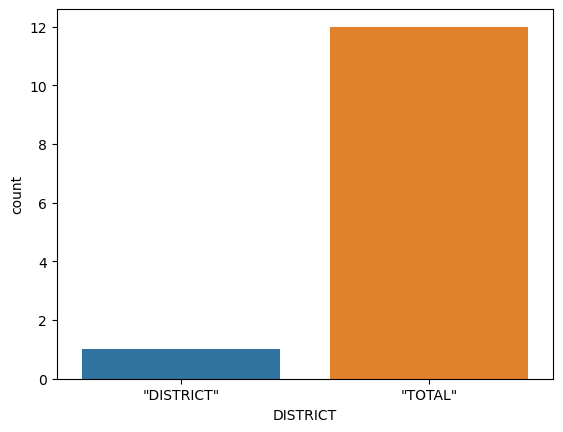

In [146]:
sns.countplot(x='DISTRICT', data=dataframe)


In [158]:
dataframe['Rape'] = pd.to_numeric(dataframe['Rape'], errors='coerce')

<AxesSubplot:xlabel='DISTRICT', ylabel='count'>

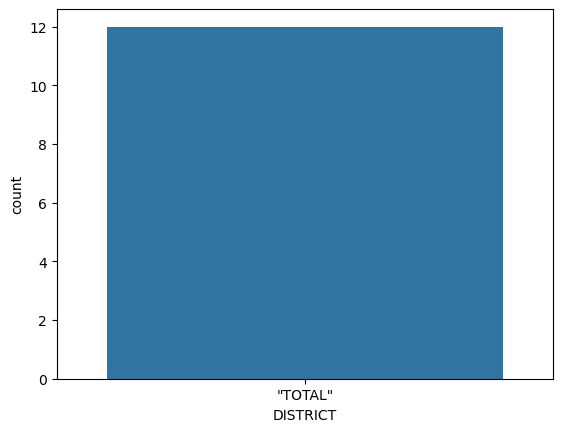

In [159]:
sns.countplot(x='DISTRICT', data=dataframe)


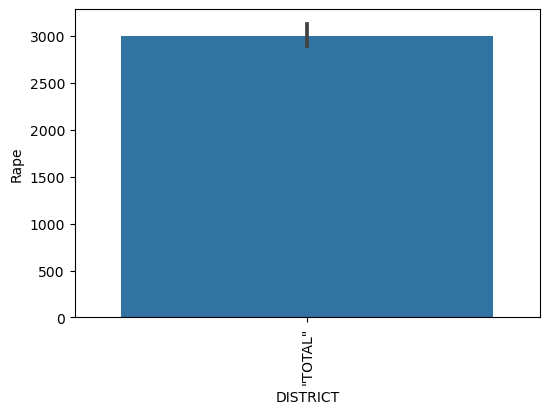

In [160]:
plt.figure(figsize=(6,4))
sns.barplot(x=dataframe['DISTRICT'], y=dataframe['Rape'])
plt.xticks(rotation='90')
plt.show()

In [161]:
#Anlaysis of District vs Kidnapping

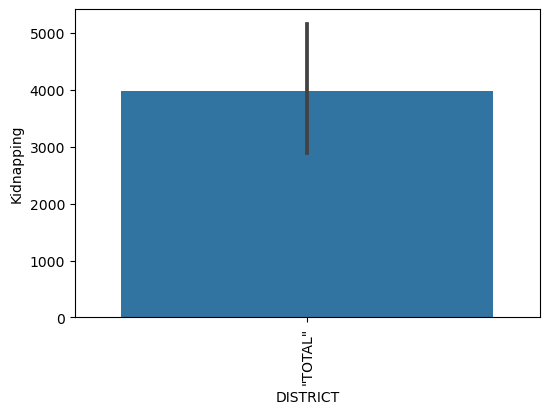

In [162]:
plt.figure(figsize=(6,4))
sns.barplot(x=dataframe['DISTRICT'], y=dataframe['Kidnapping'])
plt.xticks(rotation='90')
plt.show()